In [1]:
# Import relevant libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Import database

df = pd.read_csv("Temp+Prec", index_col=[0])


In [3]:
df.head()

,Year,Month,Precipitation,Temperature
2113,1962,2,77.2,2.5
816,1854,1,12.4,3.4
264,1808,1,4.9,3.6
600,1836,1,35.0,4.1
2460,1991,1,41.8,4.3


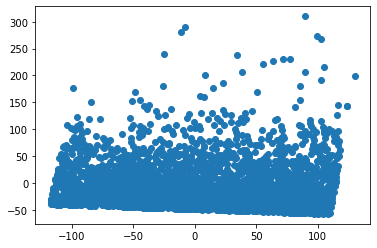

In [4]:
# Try PCA to reduce to 2 dimensions:

pca = PCA(n_components=2, random_state=123)
new_df = pca.fit_transform(df)

plt.scatter(x=new_df[:, 0], y=new_df[:, 1])

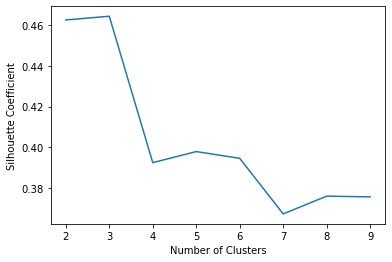

In [5]:
# Get silhouette_coefficients for different KMeans clusters:

silhouette_coefficients = []

for k in range(2, 10):    
    model = KMeans(n_clusters=k, max_iter= 300, random_state= 12)
    labels = model.fit_predict(new_df)
    score = silhouette_score(new_df, labels)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

plt.show()

Ideal cluster number is: 4


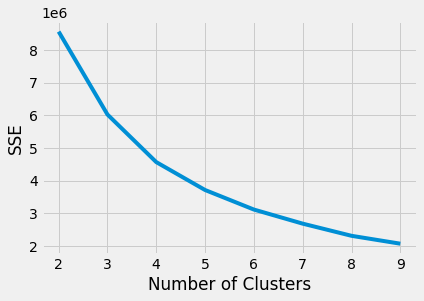

In [6]:
# Get the elbow (optimal number of clusters):

sse = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter= 300, random_state= 88)
    kmeans.fit(new_df)
    sse.append(kmeans.inertia_)
    
colze = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
print('Ideal cluster number is:', colze.elbow)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Hence, the most optimal number of clusters should be 4

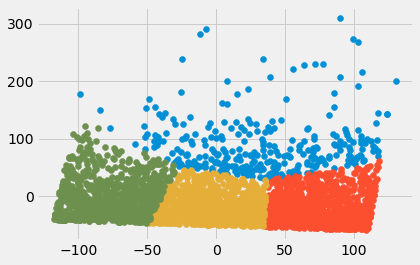

In [7]:
# Try KMeans algorithm and visualise:

kmeans = KMeans(init="random", n_clusters=4, random_state=55)

labels = kmeans.fit_predict(df)
 
for i in np.unique(labels):
    filtered_label = new_df[labels == i]
    plt.scatter(filtered_label[:, 0] , filtered_label[:, 1])
    
# The distribution seems relatively reasonable; the yellow group might be interesting

In [8]:
# Get real data distribution by cluster

df["clusters"] = labels

for i in range(4):
    df_cluster = df[df["clusters"] == i]
    print(df_cluster.describe())
    
# Cluster 0 seems to be the cluster of outliers: those where it rains the most, also where more than half the 
# values correspond to months of Autumn. Temperature does not seem to have a relationship with precipitation

# Overall, the unsupervised algorithm did a great job in identifying outliers

              Year       Month  Precipitation  Temperature  clusters
count   303.000000  303.000000     303.000000   303.000000     303.0
mean   1931.653465    7.495050     140.582178    14.858086       0.0
std      47.204382    3.302489      49.459197     4.686771       0.0
min    1793.000000    1.000000      83.200000     5.700000       0.0
25%    1898.000000    5.000000     105.150000    10.850000       0.0
50%    1931.000000    9.000000     127.900000    15.000000       0.0
75%    1969.500000   10.000000     156.150000    18.900000       0.0
max    2020.000000   12.000000     365.800000    25.300000       0.0
              Year       Month  Precipitation  Temperature  clusters
count   807.000000  807.000000     807.000000   807.000000     807.0
mean   1982.223048    6.363073      37.779430    15.224164       1.0
std      22.408951    3.427849      27.330536     5.727811       0.0
min    1941.000000    1.000000       0.000000     2.500000       1.0
25%    1963.000000    3.000000    